# Model Performance Transformations

Lets practice some basic data transformation for ML performance enhancement

In [67]:
# Imports

import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [4]:
# Categorical data analyser
def cat_var(df, cols):
    '''
    Return: a Pandas dataframe object with the following columns:
        - "categorical_variable" => every categorical variable include as an input parameter (string).
        - "number_of_possible_values" => the amount of unique values that can take a given categorical variable (integer).
        - "values" => a list with the posible unique values for every categorical variable (list).

    Input parameters:
        - df -> Pandas dataframe object: a dataframe with categorical variables.
        - cols -> list object: a list with the name (string) of every categorical variable to analyse.
    '''
    cat_list = []
    for col in cols:
        cat = df[col].unique()
        cat_num = len(cat)
        cat_dict = {"categorical_variable":col,
                    "number_of_possible_values":cat_num,
                    "values":cat}
        cat_list.append(cat_dict)
    df = pd.DataFrame(cat_list).sort_values(by="number_of_possible_values", ascending=False)
    return df.reset_index(drop=True)

In [32]:
# Netflix dataset

netflix = pd.read_csv('../data/netflix_titles.csv')
col_netflix = list(netflix.columns)
print(netflix.shape)
netflix.head()

(7787, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
cat_netflix = cat_var(netflix, col_netflix)
cat_netflix

,categorical_variable,number_of_possible_values,values
0,show_id,7787,"[s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,..."
1,title,7787,"[3%, 7:19, 23:59, 9, 21, 46, 122, 187, 706, 19..."
2,description,7769,[In a future where the elite inhabit an island...
3,cast,6832,"[João Miguel, Bianca Comparato, Michel Gomes, ..."
4,director,4050,"[nan, Jorge Michel Grau, Gilbert Chan, Shane A..."
5,date_added,1566,"[August 14, 2020, December 23, 2016, December ..."
6,country,682,"[Brazil, Mexico, Singapore, United States, Tur..."
7,listed_in,492,"[International TV Shows, TV Dramas, TV Sci-Fi ..."
8,duration,216,"[4 Seasons, 93 min, 78 min, 80 min, 123 min, 1..."
9,release_year,73,"[2020, 2016, 2011, 2009, 2008, 2019, 1997, 201..."


In [7]:
num_netflix = netflix.describe()
num_netflix

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [71]:
# Mushrooms dataset

mushrooms = pd.read_csv('../data/mushrooms.csv')
col_mushrooms = list(mushrooms.columns)
print(mushrooms.shape)
mushrooms.head()

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [9]:
cat_mushrooms = cat_var(mushrooms, col_mushrooms)
cat_mushrooms

,categorical_variable,number_of_possible_values,values
0,gill-color,12,"[k, n, g, p, w, h, u, e, b, r, y, o]"
1,cap-color,10,"[n, y, w, g, e, p, b, u, c, r]"
2,spore-print-color,9,"[k, n, u, h, w, r, o, y, b]"
3,odor,9,"[p, a, l, n, f, c, y, s, m]"
4,stalk-color-below-ring,9,"[w, p, g, b, n, e, y, o, c]"
5,stalk-color-above-ring,9,"[w, g, p, n, b, e, o, c, y]"
6,habitat,7,"[u, g, m, d, p, w, l]"
7,cap-shape,6,"[x, b, s, f, k, c]"
8,population,6,"[s, n, a, v, y, c]"
9,ring-type,5,"[p, e, l, f, n]"


In [10]:
num_mushrooms = mushrooms.describe()
num_mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [11]:
# Weather dataset

weather = pd.read_csv('../data/weatherAUS.csv')
col_weather = list(weather.columns)
print(weather.shape)
weather.head()

(145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [12]:
cat_weather = cat_var(weather, col_weather)
cat_weather

,categorical_variable,number_of_possible_values,values
0,Date,3436,"[2008-12-01, 2008-12-02, 2008-12-03, 2008-12-0..."
1,Rainfall,682,"[0.6, 0.0, 1.0, 0.2, 1.4, 2.2, 15.6, 3.6, nan,..."
2,Pressure3pm,550,"[1007.1, 1007.8, 1008.7, 1012.8, 1006.0, 1005...."
3,Pressure9am,547,"[1007.7, 1010.6, 1007.6, 1017.6, 1010.8, 1009...."
4,MaxTemp,506,"[22.9, 25.1, 25.7, 28.0, 32.3, 29.7, 25.0, 26...."
5,Temp3pm,503,"[21.8, 24.3, 23.2, 26.5, 29.7, 28.9, 24.6, 25...."
6,Temp9am,442,"[16.9, 17.2, 21.0, 18.1, 17.8, 20.6, 16.3, 18...."
7,MinTemp,390,"[13.4, 7.4, 12.9, 9.2, 17.5, 14.6, 14.3, 7.7, ..."
8,Evaporation,359,"[nan, 12.0, 14.8, 12.6, 10.8, 11.4, 11.2, 13.0..."
9,Sunshine,146,"[nan, 12.3, 13.0, 13.3, 10.6, 12.2, 8.4, 0.0, ..."


In [14]:
num_weather = weather.describe().round(2)
num_weather

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.00,144199.00,142199.00,82670.00,75625.00,135197.00,143693.00,142398.00,142806.00,140953.00,130395.00,130432.00,89572.00,86102.00,143693.00,141851.00
mean,12.19,23.22,2.36,5.47,7.61,40.04,14.04,18.66,68.88,51.54,1017.65,1015.26,4.45,4.51,16.99,21.68
std,6.40,7.12,8.48,4.19,3.79,13.61,8.92,8.81,19.03,20.80,7.11,7.04,2.89,2.72,6.49,6.94
min,-8.50,-4.80,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,980.50,977.10,0.00,0.00,-7.20,-5.40
25%,7.60,17.90,0.00,2.60,4.80,31.00,7.00,13.00,57.00,37.00,1012.90,1010.40,1.00,2.00,12.30,16.60
50%,12.00,22.60,0.00,4.80,8.40,39.00,13.00,19.00,70.00,52.00,1017.60,1015.20,5.00,5.00,16.70,21.10
75%,16.90,28.20,0.80,7.40,10.60,48.00,19.00,24.00,83.00,66.00,1022.40,1020.00,7.00,7.00,21.60,26.40
max,33.90,48.10,371.00,145.00,14.50,135.00,130.00,87.00,100.00,100.00,1041.00,1039.60,9.00,9.00,40.20,46.70


---

## Outliers

Search for outliers within categorical and numerical data. You may use any tool you find convenient. After the analysis you must decide what to do about the outliers.

![Image](../images/outliers.png)

In [17]:
import seaborn as sns

<AxesSubplot:>

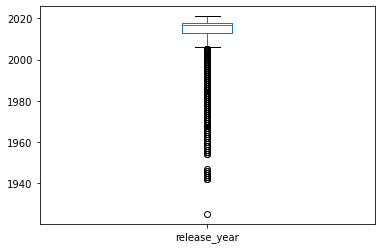

In [18]:
# Netflix outlier analysis

netflix.plot(kind='box')

# the majority of the films are recorded bewteen 2000 and 2020 years. But there are not outliers.

In [20]:
# Mushrooms outlier analysis

mushrooms.head()



,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [106]:
# Weather outlier analysis


weather.isnull().sum()


Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

---

## Scaling

Some ML algorithms have problems performing well whenever the data scale differ greatly between features. In those cases scaling the data is your best option.

- [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler)

- [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

![Image](../images/scaling.png)

In [37]:
target= # doesn't make sense
netflix_num_features = 'release_year'
netflix_cat_features = ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added','release_year', 'rating', 'duration', 'listed_in', 'description']

In [41]:
for cat_feat in netflix_cat_features:
    netflix[cat_feat] = netflix[cat_feat].astype('category')
    
cat_df = pd.get_dummies(netflix[netflix_cat_features])
num_df = netflix.loc[:,netflix_num_features]
netflix_train_df = pd.concat([cat_df, num_df], axis=1)

features = list(cat_df.columns) + list(num_df)

In [96]:
target = 'class'
features = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

In [99]:
# Mushrooms numerical data scaling: transform into numercial data and then scale them.
scaler = StandardScaler()
X = scaler.fit_transform(mushrooms.loc[:,features].values)
y = mushrooms[target]

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [104]:
# train-test split mushrooms

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# mushrooms ml model

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier
model_rf = rf.fit(X=X_train, y=y_train)

TypeError: fit() missing 1 required positional argument: 'self'

In [117]:
# Weather numerical data scaling

weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


---

## Encoding

ML algorithms do not support categorical data. Therefore you need to find a way to transform categorical data into numerical. You can use either __One Hot Encoding__ or __Label Encoding__...choose wisely!!!

- [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder)

- [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder)

![Image](../images/encoding.png)

In [ ]:
# Netflix categorical data encoding: it doesn't have sense in machine learning. 


In [72]:
# Mushrooms categorical data encoding
categorical_feature_mask = mushrooms.dtypes==object
categorical_cols = mushrooms.columns[categorical_feature_mask].tolist()
le = LabelEncoder()
mushrooms[categorical_cols] = mushrooms[categorical_cols].apply(lambda col: le.fit_transform(col))
mushrooms.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [118]:
# Weather categorical data encoding

categorical_feature_mask = weather.dtypes==object
categorical_cols = weather.columns[categorical_feature_mask].tolist()
le = LabelEncoder()
weather[categorical_cols] = weather[categorical_cols].apply(lambda col: le.fit_transform(col))
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,397,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,398,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,399,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,400,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [116]:
target = 'RainToday'

In [115]:
features = list(weather.columns)
features.remove('RainToday')
features

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainTomorrow']

In [121]:
# scaling weather
scaler = StandardScaler()
X = scaler.fit_transform(weather.loc[:,features].values)
y = weather[target]

array([[-1.73164014, -1.53166617,  0.1884771 , ..., -0.01396751,
         0.01681072, -0.53986093],
       [-1.73051017, -1.53166617, -0.74924667, ...,  0.03226649,
         0.37721649, -0.53986093],
       [-1.72938021, -1.53166617,  0.11033346, ...,  0.61789722,
         0.21863795, -0.53986093],
       ...,
       [ 1.7000566 ,  1.20928479, -1.06182126, ..., -0.69206625,
         0.63670864, -0.53986093],
       [ 1.70118656,  1.20928479, -0.68673175, ..., -0.29137154,
         0.6222924 , -0.53986093],
       [ 1.70231653,  1.20928479,  0.42290805, ..., -0.30678287,
        -0.11293535,  3.54897669]])

In [122]:
# Weather train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [123]:
# random forest weather
rf = RandomForestClassifier
model_rf = rf.fit(X=X_train, y=y_train)

TypeError: fit() missing 1 required positional argument: 'self'

CONCLUSIONS:
- Scaler hace más homogéneos los datos pero no es garantía de que mejore el modelo. 
- En el de weather, la test puede ser todo ceros porque en esa ciudad no llueve prácticamente.